In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
df = pd.read_csv(r"C:\\Users\\Krishna Baraskar\\Downloads\\SOCR-HeightWeight.csv",usecols=["Height(Inches)","Weight(Pounds)"])
df.rename(columns={"Height(Inches)" : "Height","Weight(Pounds)" : "Weight"},inplace=True)

In [92]:
df["Height"] = df.Height.ravel()*2.54
df["Weight"] = df.Weight.ravel()*0.453592

C:\Users\Krishna Baraskar\AppData\Local\Temp\ipykernel_24888\1890206276.py:1: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  df["Height"] = df.Height.ravel()*2.54
C:\Users\Krishna Baraskar\AppData\Local\Temp\ipykernel_24888\1890206276.py:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  df["Weight"] = df.Weight.ravel()*0.453592


In [93]:
df.head()

,Height,Weight
0,167.089607,51.252494
1,181.648633,61.909547
2,176.272800,69.411778
3,173.270164,64.562199
4,172.181037,65.452010


In [94]:
df.tail()

,Height,Weight
24995,176.535461,53.538008
24996,163.952580,54.518674
24997,164.334317,53.644285
24998,171.524117,59.995797
24999,174.949129,56.641938


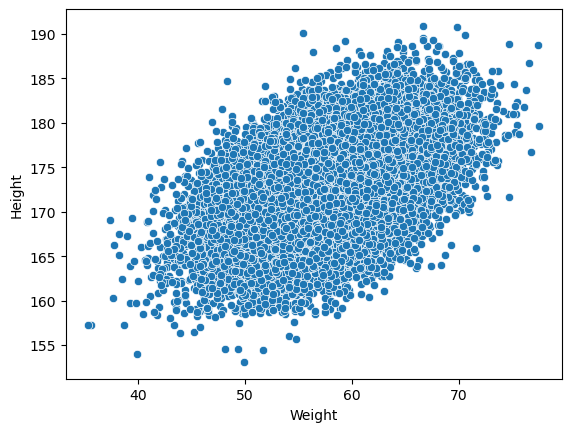

In [95]:
# scater
sns.scatterplot(x = "Weight",	y = "Height",data = df)
plt.show()

In [96]:
# Finding correlation
df.corr()

,Height,Weight
Height,1.000000,0.502859
Weight,0.502859,1.000000


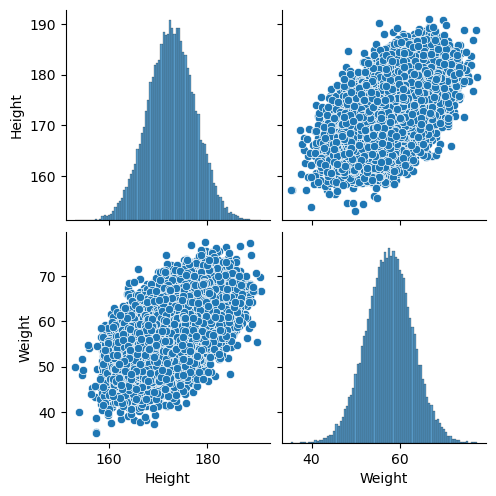

In [97]:
sns.pairplot(df)

In [98]:
# Independent and Dependent Features
x = df[["Weight"]]    # Independent features should be data frame or 2 dimension array
y = df["Height"]    # This variable can be in series or 1d array
print(type(x))
np.array(x).shape

<class 'pandas.core.frame.DataFrame'>


(25000, 1)

In [99]:
# x = df["Weight"]
# np.array(x).shape

In [100]:
x = df[["Weight"]]
y = df["Height"]

In [101]:
# Train Test Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3)

In [102]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

17500
7500
17500
7500


In [103]:
# Standardization
from sklearn.preprocessing import StandardScaler

In [104]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [105]:
x_test = scaler.transform(x_test)

In [106]:
x_test

array([[ 1.09910117],
       [ 0.09958162],
       [-0.56104696],
       ...,
       [-1.25165099],
       [ 0.72179556],
       [-0.1146036 ]])

In [107]:
# Apply simple linear Regression

In [108]:
from sklearn.linear_model import LinearRegression

In [109]:
reg = LinearRegression()

In [110]:
reg.fit(x_train,y_train)

LinearRegression()

In [111]:
print("Coefficient or slope:",reg.coef_)
print("Intercept: ",reg.intercept_)

Coefficient or slope: [2.43968769]
Intercept:  172.69853623945144


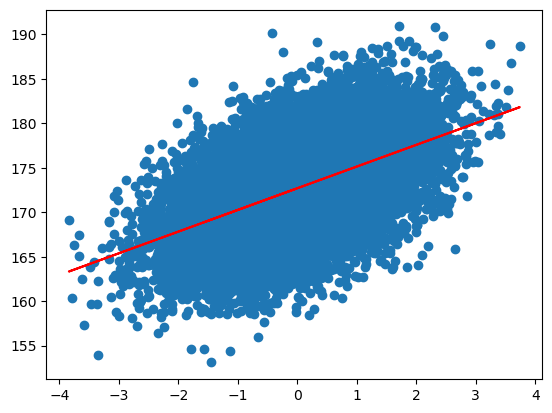

In [112]:
# plot training data plot best fit line
plt.scatter(x_train,y_train)
plt.plot(x_train,reg.predict(x_train),c = "r")

**Prdiction of test data**

 ```python
 y_pred_test = (reg.coef_ * (x_test).ravel()) + reg.intercept_
 ```

In [113]:
# Prediction to test data 
y_pred = reg.predict(x_test)

In [114]:
# Performance Matrix
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [115]:
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2_score_ = r2_score(y_test,y_pred)

print("mae :",mae)
print("mse :",mse)
print("rmse :",rmse)
print("r2_score_ :",r2_score_)

mae : 3.3597115263368935
mse : 17.63269715039432
rmse : 4.199130523143371
r2_score_ : 0.24674114568516692


In [116]:
# OLS Linear Regression
import statsmodels.api as sm

In [117]:
model = sm.OLS(x_train,y_train).fit()

In [118]:
y_predi = model.predict(x_test)
y_predi

array([ 8.98370506e-05,  8.13948604e-06, -4.58582027e-05, ...,
       -1.02305989e-04,  5.89972842e-05, -9.36733564e-06])

In [119]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):              0.000
Method:                 Least Squares   F-statistic:                              3.490
Date:                Thu, 29 Aug 2024   Prob (F-statistic):                      0.0617
Time:                        12:33:21   Log-Likelihood:                         -24830.
No. Observations:               17500   AIC:                                  4.966e+04
Df Residuals:                   17499   BIC:                                  4.967e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [121]:
# Prediction for new data
reg.predict(scaler.transform([[72]]))

c:\Users\Krishna Baraskar\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([179.34248977])